In [153]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [154]:
df = pd.read_csv('loan_approval_data.csv')
df.head(30)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
5,lp001011,male,yes,2.0,graduate,yes,5417,4196.0,267.0,360.0,1.0,urban,y
6,lp001013,male,yes,0.0,not graduate,no,2333,1516.0,95.0,360.0,1.0,urban,y
7,lp001014,male,yes,3.0,graduate,no,3036,2504.0,158.0,360.0,0.0,semiurban,n
8,lp001018,male,yes,2.0,graduate,no,4006,1526.0,168.0,360.0,1.0,urban,y
9,lp001020,male,yes,1.0,graduate,no,12841,10968.0,349.0,360.0,1.0,semiurban,n


In [155]:
df.shape

(614, 13)

In [156]:
len(df[df.duplicated()])
# so we dont have any duplicate record

0

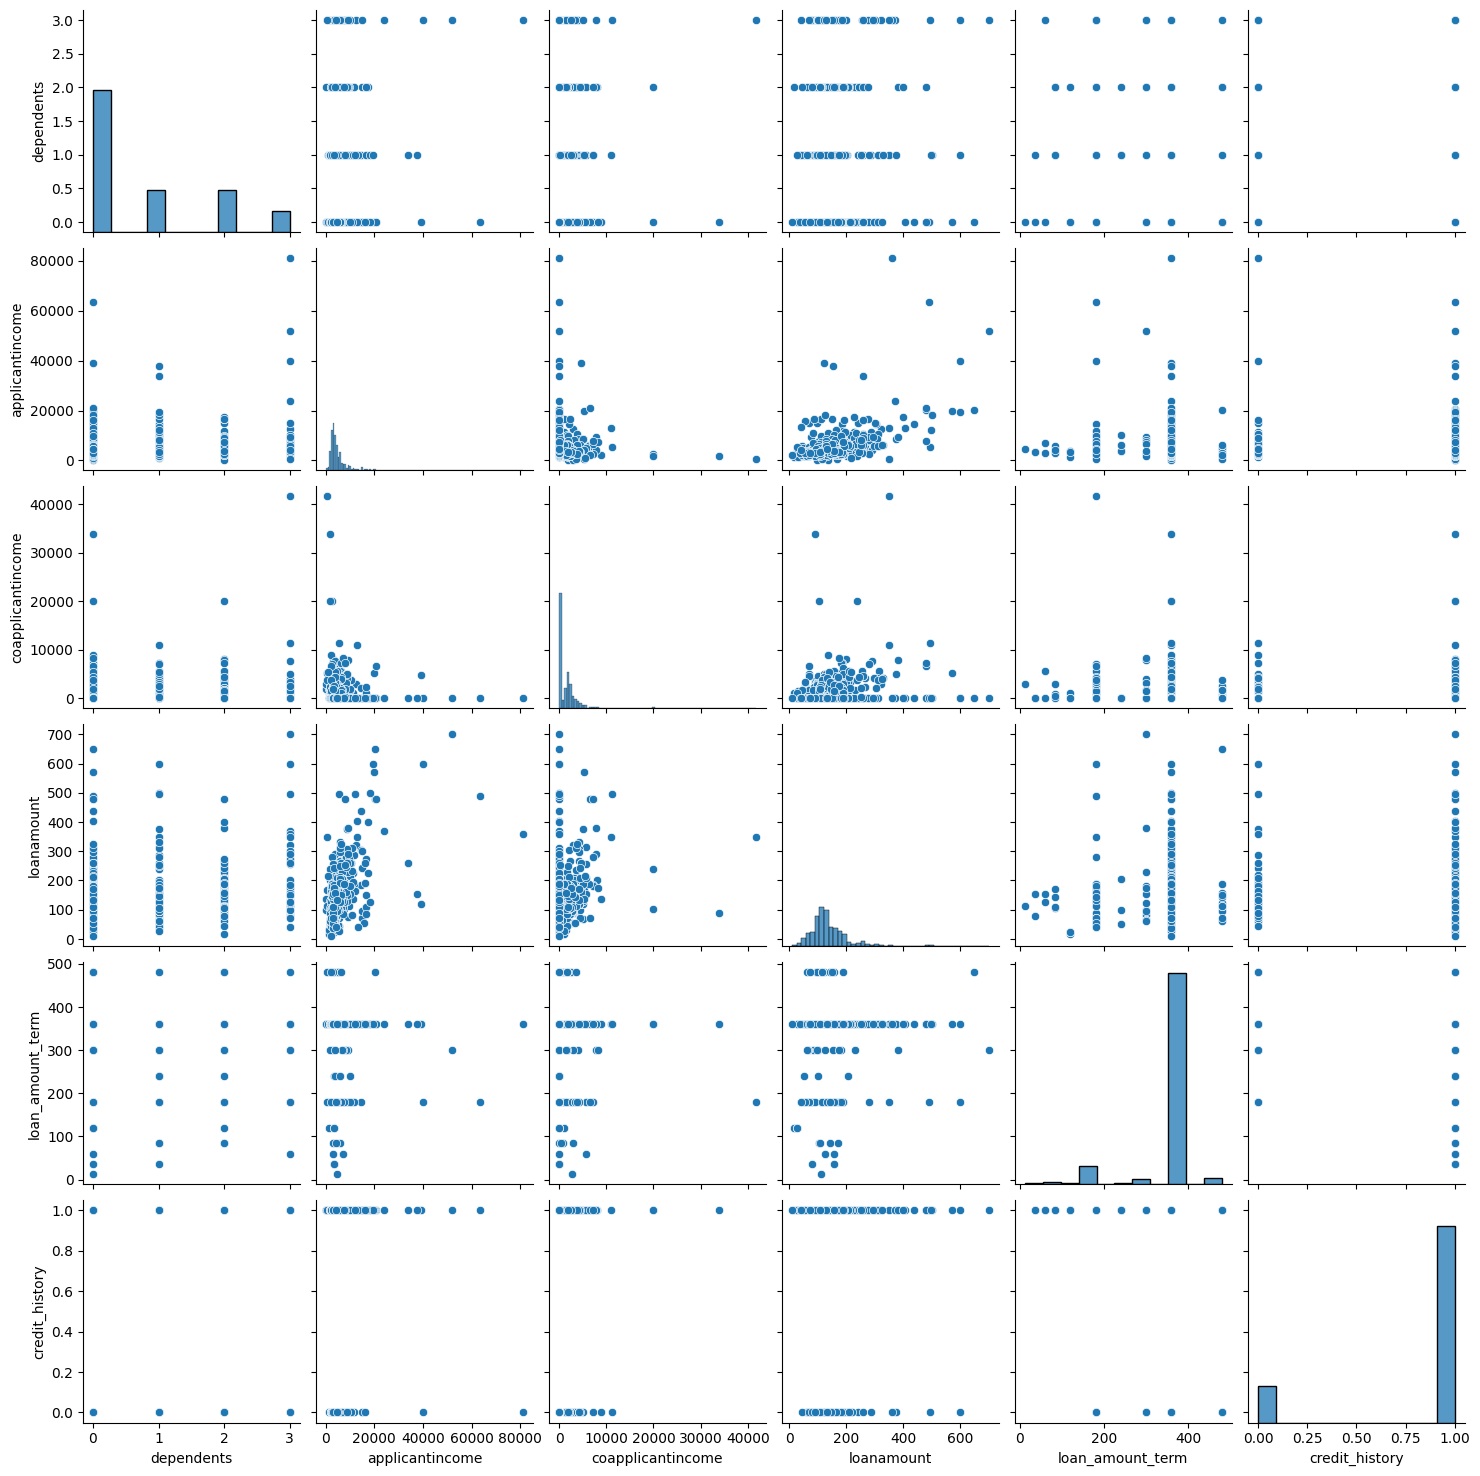

In [157]:
sns.pairplot(df)

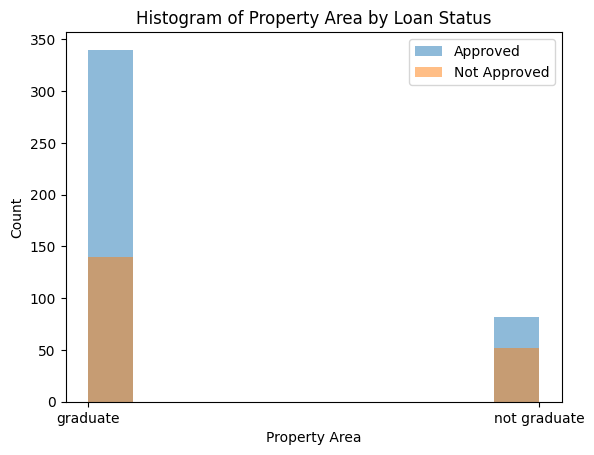

In [158]:
plt.hist(df[df['loan_status'] == 'y']['education'], bins=10, alpha=0.5, label='Approved')
plt.hist(df[df['loan_status'] == 'n']['education'], bins=10, alpha=0.5, label='Not Approved')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Histogram of Property Area by Loan Status')
plt.legend()
plt.show()

In [159]:
missing_values = df.isnull().sum()
missing_values

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

# dropped rows which have more than two missing column.This very imp because we cant predict anything if more than two values are missing.

In [160]:
df.dropna(thresh=df.shape[1]-1, inplace=True)

In [161]:
missing_values = df.isnull().sum()
missing_values

loan_id               0
gender               12
married               0
dependents           10
education             0
self_employed        25
applicantincome       0
coapplicantincome     0
loanamount           19
loan_amount_term     12
credit_history       43
property_area         0
loan_status           0
dtype: int64

In [162]:
import random
gen=['male','female']
df['gender'] = df['gender'].fillna(random.choice(gen))

In [163]:
dep=[0.0,1.0,2.0]
df['dependents'] = df['dependents'].fillna(random.choice(dep))

In [164]:
df.shape

(601, 13)

In [165]:
df.dropna(subset=['loanamount'], inplace=True)

In [166]:
gen=['yes','no']
df['self_employed'] = df['self_employed'].fillna(random.choice(gen))

In [167]:
missing_values = df.isnull().sum()
missing_values

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount            0
loan_amount_term     12
credit_history       43
property_area         0
loan_status           0
dtype: int64

In [168]:
df['loan_amount_term'] = df['loan_amount_term'].fillna(360)

In [169]:
credit_history_counts = df['credit_history'].value_counts()
print(credit_history_counts)

1.0    454
0.0     85
Name: credit_history, dtype: int64


In [170]:
df['credit_history'] = df['credit_history'].fillna(0.832)

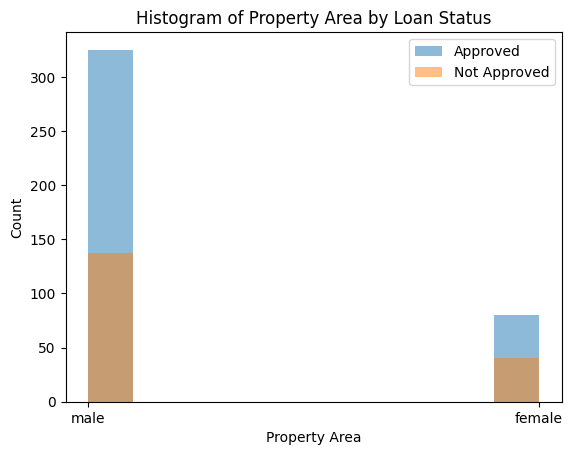

In [171]:
plt.hist(df[df['loan_status'] == 'y']['gender'], bins=10, alpha=0.5, label='Approved')
plt.hist(df[df['loan_status'] == 'n']['gender'], bins=10, alpha=0.5, label='Not Approved')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Histogram of Property Area by Loan Status')
plt.legend()
plt.show()

# it looks like males are likely to getting approved is more than females but it is based on their earning.This means generally males are getting paid more

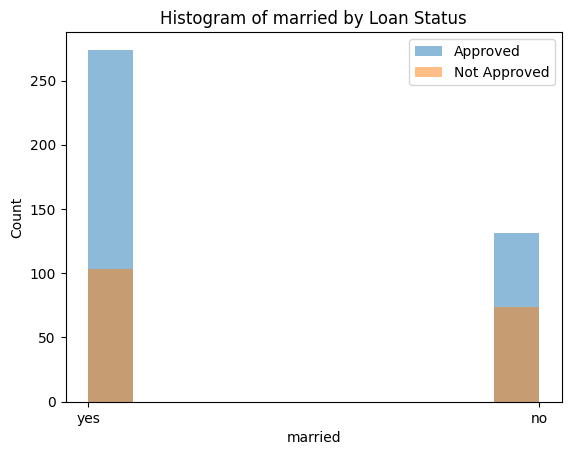

In [172]:
plt.hist(df[df['loan_status'] == 'y']['married'], bins=10, alpha=0.5, label='Approved')
plt.hist(df[df['loan_status'] == 'n']['married'], bins=10, alpha=0.5, label='Not Approved')
plt.xlabel('married')
plt.ylabel('Count')
plt.title('Histogram of married by Loan Status')
plt.legend()
plt.show()

# it looks like married are likely to getting approved is more than unmarried but in general people often get married when they have a proper source of earning. 

In [173]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
5,lp001011,male,yes,2.0,graduate,yes,5417,4196.0,267.0,360.0,1.0,urban,y


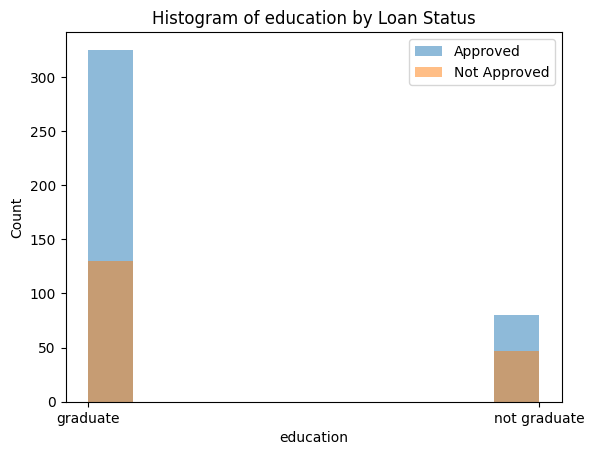

In [174]:
plt.hist(df[df['loan_status'] == 'y']['education'], bins=10, alpha=0.5, label='Approved')
plt.hist(df[df['loan_status'] == 'n']['education'], bins=10, alpha=0.5, label='Not Approved')
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Histogram of education by Loan Status')
plt.legend()
plt.show()

# graduated are likely to getting approved is more than not graduated

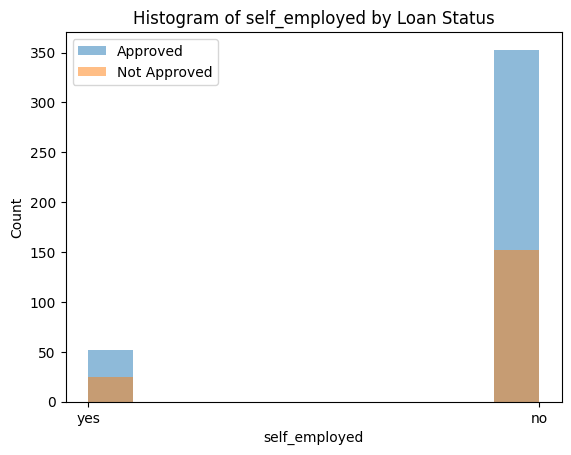

In [175]:
plt.hist(df[df['loan_status'] == 'y']['self_employed'], bins=10, alpha=0.5, label='Approved')
plt.hist(df[df['loan_status'] == 'n']['self_employed'], bins=10, alpha=0.5, label='Not Approved')
plt.xlabel('self_employed')
plt.ylabel('Count')
plt.title('Histogram of self_employed by Loan Status')
plt.legend()
plt.show()

# generally self-employed do not have much earning may be beacuse of that they are likely to have less loan approval.

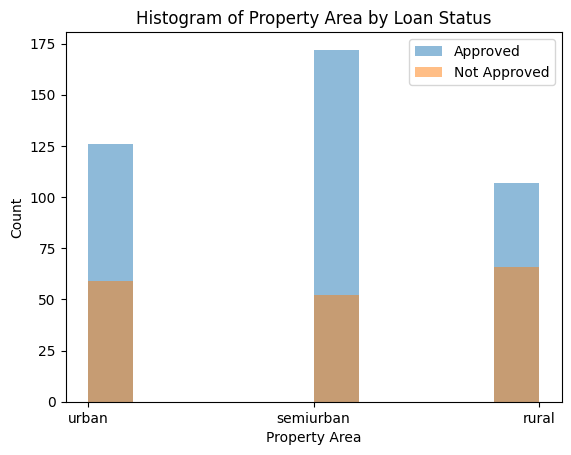

In [176]:
plt.hist(df[df['loan_status'] == 'y']['property_area'], bins=10, alpha=0.5, label='Approved')
plt.hist(df[df['loan_status'] == 'n']['property_area'], bins=10, alpha=0.5, label='Not Approved')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Histogram of Property Area by Loan Status')
plt.legend()
plt.show()

In [177]:
missing_values = df.isnull().sum()
missing_values

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

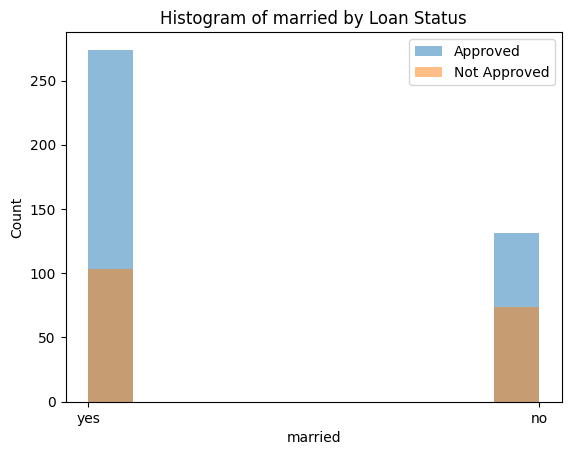

In [178]:
plt.hist(df[df['loan_status'] == 'y']['married'], bins=10, alpha=0.5, label='Approved')
plt.hist(df[df['loan_status'] == 'n']['married'], bins=10, alpha=0.5, label='Not Approved')
plt.xlabel('married')
plt.ylabel('Count')
plt.title('Histogram of married by Loan Status')
plt.legend()
plt.show()

In [179]:
df.drop(['gender', 'loan_id'], axis=1, inplace=True)

In [180]:
df

,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
5,yes,2.0,graduate,yes,5417,4196.0,267.0,360.0,1.0,urban,y
...,...,...,...,...,...,...,...,...,...,...,...
609,no,0.0,graduate,no,2900,0.0,71.0,360.0,1.0,rural,y
610,yes,3.0,graduate,no,4106,0.0,40.0,180.0,1.0,rural,y
611,yes,1.0,graduate,no,8072,240.0,253.0,360.0,1.0,urban,y
612,yes,2.0,graduate,no,7583,0.0,187.0,360.0,1.0,urban,y


In [181]:
df['applicantincome']=df['applicantincome']+df['coapplicantincome']
df.drop(['coapplicantincome'], axis=1, inplace=True)

In [182]:
df

,married,dependents,education,self_employed,applicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,yes,1.0,graduate,no,6091.0,128.0,360.0,1.0,rural,n
2,yes,0.0,graduate,yes,3000.0,66.0,360.0,1.0,urban,y
3,yes,0.0,not graduate,no,4941.0,120.0,360.0,1.0,urban,y
4,no,0.0,graduate,no,6000.0,141.0,360.0,1.0,urban,y
5,yes,2.0,graduate,yes,9613.0,267.0,360.0,1.0,urban,y
...,...,...,...,...,...,...,...,...,...,...
609,no,0.0,graduate,no,2900.0,71.0,360.0,1.0,rural,y
610,yes,3.0,graduate,no,4106.0,40.0,180.0,1.0,rural,y
611,yes,1.0,graduate,no,8312.0,253.0,360.0,1.0,urban,y
612,yes,2.0,graduate,no,7583.0,187.0,360.0,1.0,urban,y


In [183]:
df['average_sal']=df['applicantincome']/(df['dependents']+1)

In [184]:
df['loanamount']=df['loanamount']*1000

In [185]:
df

,married,dependents,education,self_employed,applicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,average_sal
1,yes,1.0,graduate,no,6091.0,128000.0,360.0,1.0,rural,n,3045.500000
2,yes,0.0,graduate,yes,3000.0,66000.0,360.0,1.0,urban,y,3000.000000
3,yes,0.0,not graduate,no,4941.0,120000.0,360.0,1.0,urban,y,4941.000000
4,no,0.0,graduate,no,6000.0,141000.0,360.0,1.0,urban,y,6000.000000
5,yes,2.0,graduate,yes,9613.0,267000.0,360.0,1.0,urban,y,3204.333333
...,...,...,...,...,...,...,...,...,...,...,...
609,no,0.0,graduate,no,2900.0,71000.0,360.0,1.0,rural,y,2900.000000
610,yes,3.0,graduate,no,4106.0,40000.0,180.0,1.0,rural,y,1026.500000
611,yes,1.0,graduate,no,8312.0,253000.0,360.0,1.0,urban,y,4156.000000
612,yes,2.0,graduate,no,7583.0,187000.0,360.0,1.0,urban,y,2527.666667


In [186]:
df['ratio']=df['loanamount']/(df['average_sal']*df['loan_amount_term'])

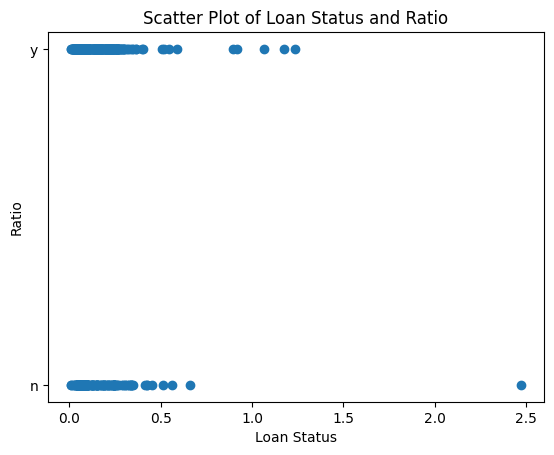

In [187]:
plt.scatter(df['ratio'], df['loan_status'])
plt.xlabel('Loan Status')
plt.ylabel('Ratio')
plt.title('Scatter Plot of Loan Status and Ratio')
plt.show()

In [188]:
df.head()

,married,dependents,education,self_employed,applicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,average_sal,ratio
1,yes,1.0,graduate,no,6091.0,128000.0,360.0,1.0,rural,n,3045.500000,0.116748
2,yes,0.0,graduate,yes,3000.0,66000.0,360.0,1.0,urban,y,3000.000000,0.061111
3,yes,0.0,not graduate,no,4941.0,120000.0,360.0,1.0,urban,y,4941.000000,0.067463
4,no,0.0,graduate,no,6000.0,141000.0,360.0,1.0,urban,y,6000.000000,0.065278
5,yes,2.0,graduate,yes,9613.0,267000.0,360.0,1.0,urban,y,3204.333333,0.231457


In [189]:
df['education'] = df['education'].replace('not graduate', 1)
df['education'] = df['education'].replace('graduate', 2)


In [190]:
df['self_employed'] = df['self_employed'].replace('no', 1)
df['self_employed'] = df['self_employed'].replace('yes', 2)

In [191]:
df['married'] = df['married'].replace('yes', 2)
df['married'] = df['married'].replace('no', 1)

In [192]:
df.head(20)

,married,dependents,education,self_employed,applicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,average_sal,ratio
1,2,1.0,2,1,6091.0,128000.0,360.0,1.000,rural,n,3045.500000,0.116748
2,2,0.0,2,2,3000.0,66000.0,360.0,1.000,urban,y,3000.000000,0.061111
3,2,0.0,1,1,4941.0,120000.0,360.0,1.000,urban,y,4941.000000,0.067463
4,1,0.0,2,1,6000.0,141000.0,360.0,1.000,urban,y,6000.000000,0.065278
5,2,2.0,2,2,9613.0,267000.0,360.0,1.000,urban,y,3204.333333,0.231457
6,2,0.0,1,1,3849.0,95000.0,360.0,1.000,urban,y,3849.000000,0.068560
7,2,3.0,2,1,5540.0,158000.0,360.0,0.000,semiurban,n,1385.000000,0.316887
8,2,2.0,2,1,5532.0,168000.0,360.0,1.000,urban,y,1844.000000,0.253073
9,2,1.0,2,1,23809.0,349000.0,360.0,1.000,semiurban,n,11904.500000,0.081435
10,2,2.0,2,1,3900.0,70000.0,360.0,1.000,urban,y,1300.000000,0.149573


In [193]:
df['property_area'] = df['property_area'].replace('rural', 1)
df['property_area'] = df['property_area'].replace('urban', 2)
df['property_area'] = df['property_area'].replace('semiurban', 3)

In [194]:
df.drop(['dependents','applicantincome'], axis=1, inplace=True)

In [195]:
df.head(10)

,married,education,self_employed,loanamount,loan_amount_term,credit_history,property_area,loan_status,average_sal,ratio
1,2,2,1,128000.0,360.0,1.0,1,n,3045.500000,0.116748
2,2,2,2,66000.0,360.0,1.0,2,y,3000.000000,0.061111
3,2,1,1,120000.0,360.0,1.0,2,y,4941.000000,0.067463
4,1,2,1,141000.0,360.0,1.0,2,y,6000.000000,0.065278
5,2,2,2,267000.0,360.0,1.0,2,y,3204.333333,0.231457
6,2,1,1,95000.0,360.0,1.0,2,y,3849.000000,0.068560
7,2,2,1,158000.0,360.0,0.0,3,n,1385.000000,0.316887
8,2,2,1,168000.0,360.0,1.0,2,y,1844.000000,0.253073
9,2,2,1,349000.0,360.0,1.0,3,n,11904.500000,0.081435
10,2,2,1,70000.0,360.0,1.0,2,y,1300.000000,0.149573


In [196]:
df1=df.drop(['married','self_employed','loanamount','loan_amount_term'], axis=1)

In [197]:
X = df1.drop('loan_status', axis=1)  # Independent features
y = df1['loan_status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
df1

,education,credit_history,property_area,loan_status,average_sal,ratio
1,2,1.0,1,n,3045.500000,0.116748
2,2,1.0,2,y,3000.000000,0.061111
3,1,1.0,2,y,4941.000000,0.067463
4,2,1.0,2,y,6000.000000,0.065278
5,2,1.0,2,y,3204.333333,0.231457
...,...,...,...,...,...,...
609,2,1.0,1,y,2900.000000,0.068008
610,2,1.0,1,y,1026.500000,0.216485
611,2,1.0,2,y,4156.000000,0.169100
612,2,1.0,2,y,2527.666667,0.205504


In [199]:
adaboost = AdaBoostClassifier(random_state=42)

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.811965811965812


In [200]:
import pickle
with open('model.pkl','wb') as file:
    
    pickle.dump(adaboost, file)


In [201]:
pwd

'D:\\padhai\\kaggle'

In [202]:
random_forest = RandomForestClassifier(n_estimators=20, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the training set
y_train_pred = random_forest.predict(X_train)

# Measure training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9978494623655914
